In [1]:
import cv2
import h5py
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%load_ext autoreload
%autoreload 2
from uhcsseg import io
from uhcsseg import hypercolumn, segment

Using Theano backend.


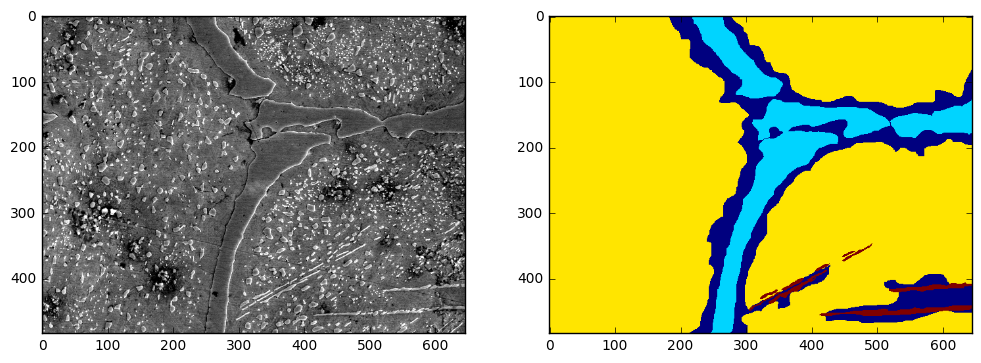

In [3]:
images, labels, keys = io.load_dataset('data/uhcs.h5', cropbar=38)
fig, ax = plt.subplots(1,2, figsize=(12,8))
ax[0].imshow(images[0], cmap=plt.cm.gray)
ax[1].imshow(labels[0])

In [4]:
hc = hypercolumn.ReducedHyperColumn()

ntrain = 20
Xtrain = hc.fit(images[:ntrain], verbose=True)

computing feature maps
reducing block1_conv2 features


/home/brian/Documents/Research/Projects/uhcs-segment/uhcsseg/hypercolumn.py:70: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  choice = np.random.choice(ff.shape[0], size=1e6, replace=False)


interpolating block1_conv2 features
reducing block2_conv2 features
interpolating block2_conv2 features
reducing block3_conv3 features
interpolating block3_conv3 features
reducing block4_conv3 features
interpolating block4_conv3 features
reducing block5_conv3 features
interpolating block5_conv3 features


In [5]:
clf = segment.TensorSGD()
clf.fit(Xtrain, labels[:ntrain])

(6243600, 160)
SVM model finished.


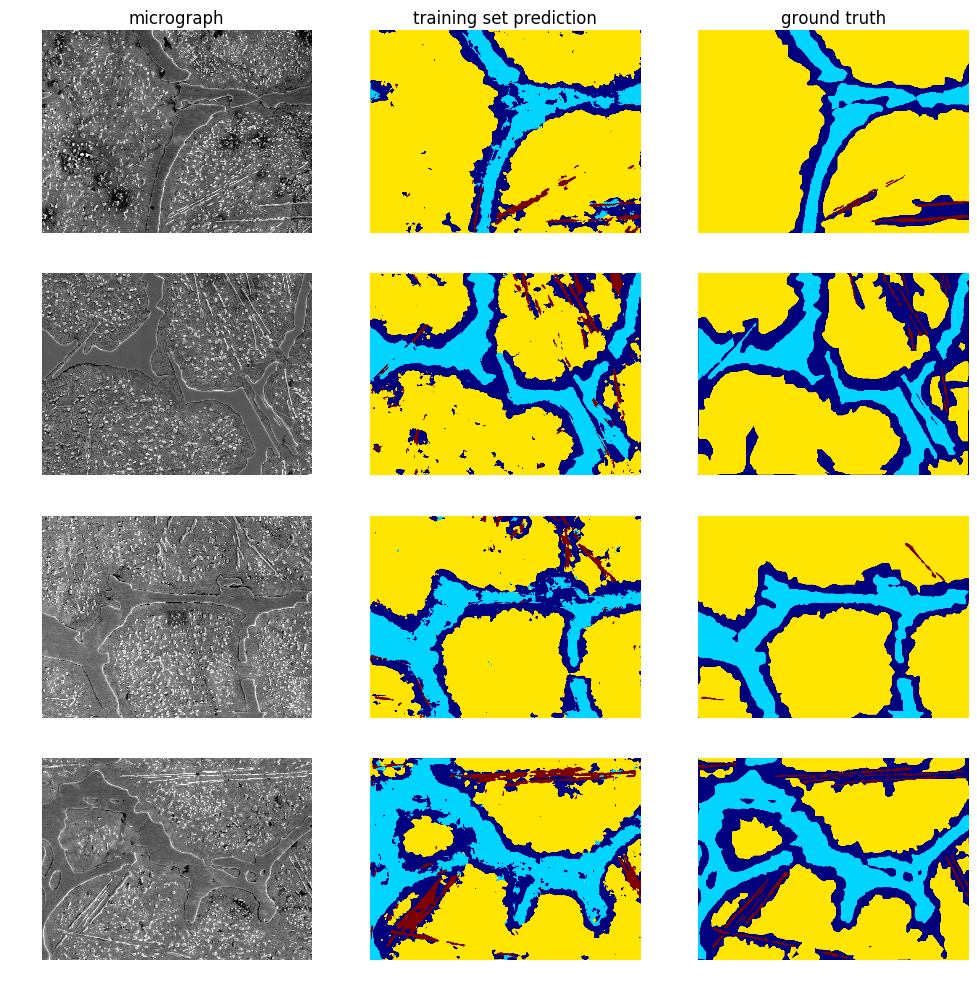

In [8]:
yy = clf.predict(Xtrain)
y = np.array(labels[:ntrain])

fig, axes = plt.subplots(4,3,figsize=(12,12))
idx = 0
for idx, ax in enumerate(axes):
    if idx == 0:
        for a, title in zip(ax, ('micrograph', 'training set prediction', 'ground truth')):
            a.set_title(title)
    ax[0].imshow(images[idx], cmap=plt.cm.gray)
    ax[1].imshow(yy[idx])
    ax[2].imshow(y[idx])
    
    for a in ax:
        a.axis('off')

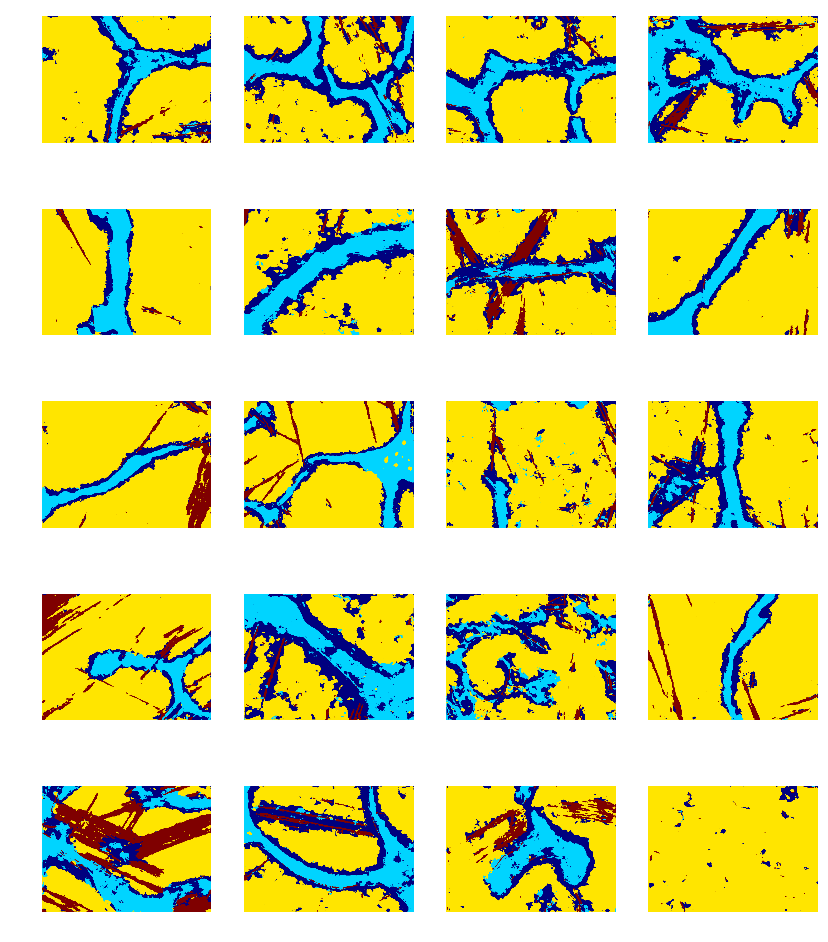

In [16]:
# display all training set predictions
fig, axes = plt.subplots(5,4, figsize=(10,12))
for idx, ax in enumerate(axes.flat):
    ax.imshow(yy[idx])
    ax.axis('off')

In [9]:
# apply model to test images.... which don't have annotations yet.
test = [1232, 1356, 1411, 710]

from skimage.io import imread
def load_tif(m_id):
    im = imread('images/uhcs/micrograph{}.tif'.format(m_id), as_grey=True)
    return im[:-38]

# extract featuremaps for multiple images
t_images = [load_tif(key) for key in test]

Xtest = hc.predict(t_images, verbose=True)

/usr/lib/python3.5/site-packages/skimage/external/tifffile/tifffile_local.py:1394: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


computing feature maps
reducing block1_conv2 features
interpolating block1_conv2 features
reducing block2_conv2 features
interpolating block2_conv2 features
reducing block3_conv3 features
interpolating block3_conv3 features
reducing block4_conv3 features
interpolating block4_conv3 features
reducing block5_conv3 features
interpolating block5_conv3 features


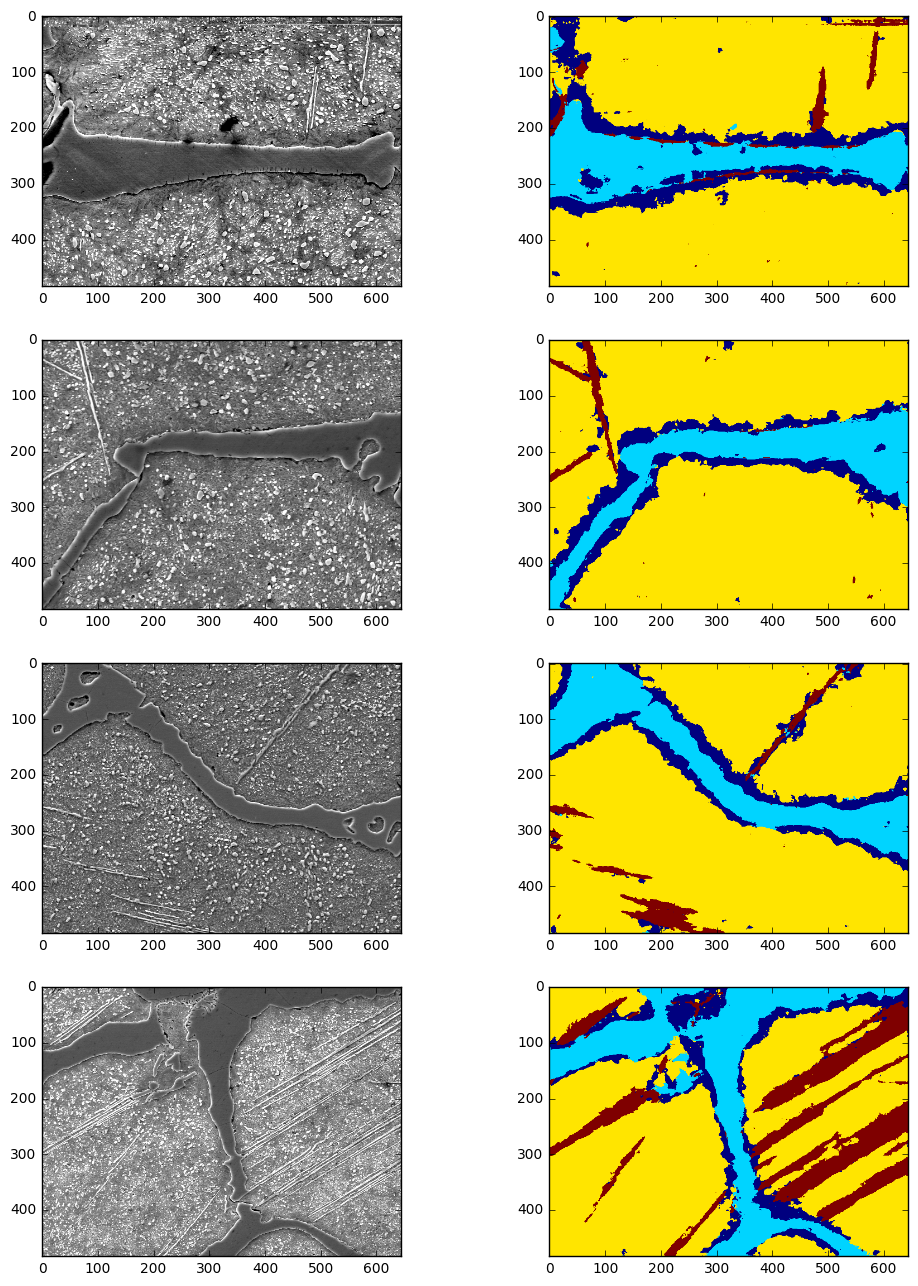

In [14]:
t_y = clf.predict(Xtest)
t_yy = t_y.reshape((4, h, w))

fig, axes = plt.subplots(4,2,figsize=(12,16))
idx = 0
for idx, ax in enumerate(axes):
    ax[0].imshow(t_images[idx], cmap=plt.cm.gray)
    ax[1].imshow(t_yy[idx])